In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Our first task is to determine the probabilities corresponding to different "sigma" values. We will try several from $0.25\sigma$ to $3\sigma$.

In [26]:
i = 0
while i < 3:
    i += 0.25
    print( str(i)+"σ: "+str(stats.norm.cdf(i)) )

0.25σ: 0.5987063256829237
0.5σ: 0.6914624612740131
0.75σ: 0.7733726476231317
1.0σ: 0.8413447460685429
1.25σ: 0.8943502263331446
1.5σ: 0.9331927987311419
1.75σ: 0.9599408431361829
2.0σ: 0.9772498680518208
2.25σ: 0.9877755273449553
2.5σ: 0.9937903346742238
2.75σ: 0.9970202367649454
3.0σ: 0.9986501019683699


These match the $z$-score table in the appendix of *Introduction to Probability* by Anderson, Seppäläinen, & Valkó.

Using the CDF values we calculated already for 1σ, 2σ, and 3σ, we will verify using the point percent function that they correspond to the appropriate number of standard deviations.

In [14]:
probs = [0.8413447460685429, 0.9772498680518208, 0.9986501019683699]
for p in probs:
    print( str(p)+": "+str(stats.norm.ppf(p)) )

0.8413447460685429: 1.0
0.9772498680518208: 2.0000000000000004
0.9986501019683699: 2.9999999999999982


These agree very well with the known number of standard deviations for each measurement.

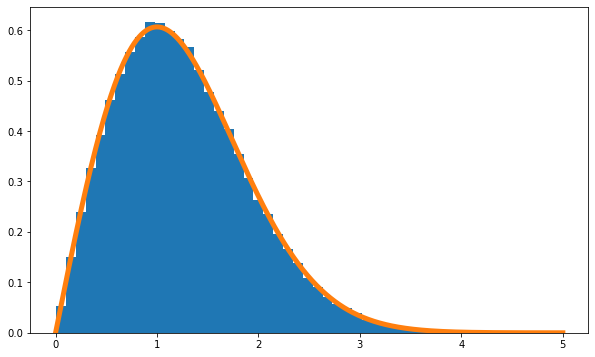

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.hist(stats.rayleigh.rvs(size=100000), 50, density=True)
x = np.linspace(0, 5, 1000)
ax.plot(x, stats.rayleigh.pdf(x), linewidth=5)
plt.show();

For my hypothetical measurement of $x$, I arbitrarily choose the value $x_0=1.8$. I would like to determine the probability that this was a false measurement, i.e. that my signal-free data produced a signal that is equally or more signal-like that what I observed. Stated in integral form, I want to find the probability
$$ p(x_0) = \int_{x_0}^\infty \text{pdf}(x) \: dx $$
where pdf($x$) in this case is the PDF of the Rayleigh distribution. This is equivalent to finding $1 - \text{cdf}(x)$.

In [23]:
x0 = 1.8
print( 1 - stats.rayleigh.cdf(x0) )

0.19789869908361468


There appears to be a $19.8\%$ chance that the background produced the measured signal. This probability corresponds to a certain number of standard deviations away from the mean of the normal distribution:

In [32]:
stats.norm.ppf( stats.rayleigh.cdf(x0) )

0.8491507784123539

This is a $0.85\sigma$ measurement.

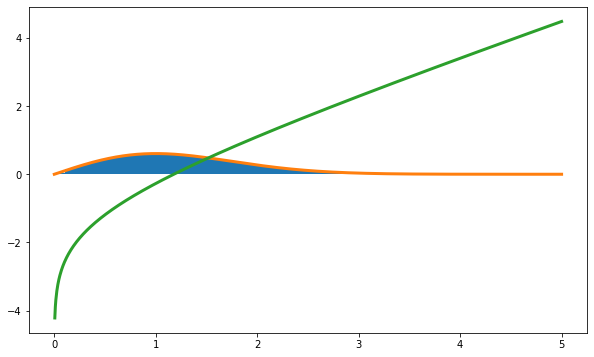

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.hist(stats.rayleigh.rvs(size=100000), 50, density=True)
x = np.linspace(0, 5, 1000)
ax.plot(x, stats.rayleigh.pdf(x), linewidth=3)
ax.plot(x, stats.norm.ppf( stats.rayleigh.cdf(x) ), linewidth=3)
plt.show();

The green line here shows the number of standard deviations as a function of measurement positions $x$. As expected, the resulting curve is asymmetric, since there is a small chance of false signals at large values of $x$, but this probability falls off to zero at $x=0$ with the Rayleigh distribution.

In [39]:
stats.rayleigh.ppf(0.5)

1.1774100225154747

The position of $0\sigma$ is $x \approx 1.18$, which makes sense visually since it looks like this is about the average of the distribution.

My non-continuous distribution is the binomial distribution. What follows is 16 binomial distributions with different choices for $n$ and $p$.

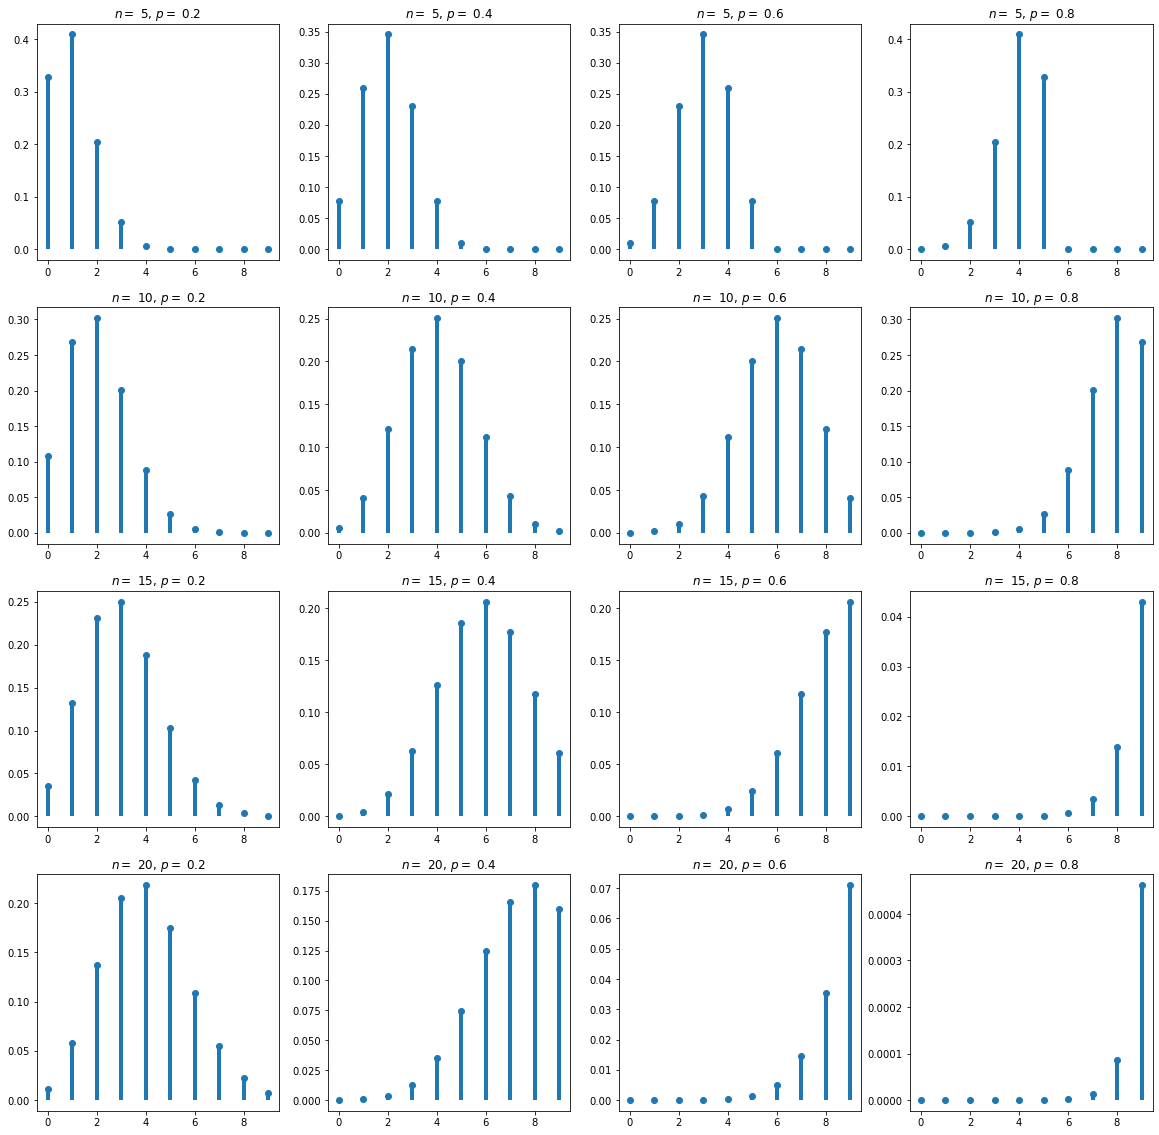

In [88]:
k = range(10)
n = 0

fig, ax = plt.subplots(4, 4, figsize=(20, 20))
for i in range(4):
    n += 5
    p = 0
    for j in range(4):
        p += 0.2
        ax[i, j].set_title("$n=$ "+str(n)+", $p=$ "+str(round(p,1)))
        ax[i, j].scatter(k, stats.binom.pmf(k, n, p))
        ax[i, j].vlines(k, 0, stats.binom.pmf(k, n, p), lw=4)

The PMF of the binomial distribution is defined as
$$ f(k) = \binom{n}{k} p^k (1 - p)^{n - k}. $$
It gives the probability of $k$ successes in $n$ independent trials, with $p$ being the probability of success in each trial. For instance, it predicts the probability of flipping heads $k$ times out of $n$, in which case we set $p = 0.5$. It makes sense that the mean of the distribution ought to shift to higher $k$ when we increase $n$, since for example we have a greater chance of flipping heads 4 times if the coin is flipped 7 times rather than 4. We also see that the mean shifts to higher $k$ when we increase $p$, since this means a higher chance of success in each trial.

My hypothetical question is this: If my data have a background that is binomially distributed, $X \sim \text{Bin}(15, 0.2)$, then what is the probability that a signal I measure at $k_0 = 8$ is produced by the background? Expressed in mathematical form, I would like to determine the probability
$$ p(k_0) = \sum_{k=k_0}^\infty \binom{n}{k} p^k (1 - p)^{n - k}. $$

In [84]:
k0 = 8
print( 1 - stats.binom.cdf(k0, 15, 0.2) )

0.0007849853911040539


There appears to be a $0.0785\%$ chance of a false measurement at $k = 8$.

It makes sense that certain parameters, like the mean and standard deviation, can change continuously even in a discrete distribution, like the binomial distribution. The mean, for instance, is the sum of all values of $k$ divided by the number of values. Even if all values of $k$ are integers, this can result in a non-integer number. This is akin to how in quantum mechanics the expectation value of measurements in the Stern-Gerlach experiment is 0, which is not a possible outcome of the experiment.
Because the standard deviation of a measured value depends on the mean, the standard deviation also changes continuously. The probabilities of measurement at different values of $k$ are discrete, however, since these are discretized.